<a href="https://colab.research.google.com/github/shlokshukla200/ML-Timeseries/blob/main/Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
#Create a Synthetic Time Series Dataset

np.random.seed(0)
date_rng = pd.date_range(start="2021-01-01", periods=365, freq="D")
data = np.sin(np.arange(365) * 2 * np.pi / 365) + np.random.normal(0, 0.5, 365)
ts = pd.Series(data, index=date_rng)
ts

,0
2021-01-01,0.882026
2021-01-02,0.217292
2021-01-03,0.523791
2021-01-04,1.172066
2021-01-05,1.002581
...,...
2021-12-27,0.263264
2021-12-28,-0.066917
2021-12-29,0.414305
2021-12-30,0.135561


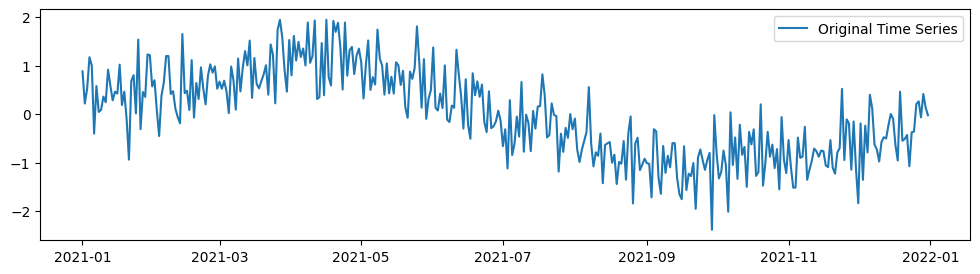

In [3]:
#Visualize the Dataset

plt.figure(figsize=(12, 3))
plt.plot(ts, label='Original Time Series')
plt.legend()

In [4]:
#Apply Additive Decomposition

result_add = seasonal_decompose(ts, model='additive')

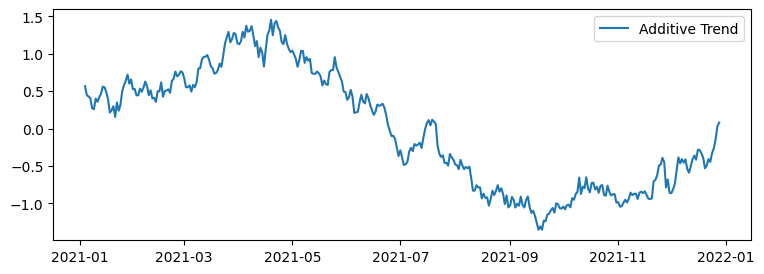

In [5]:
#Plot the Trend Component

plt.figure(figsize=(9, 3))
plt.plot(result_add.trend, label='Additive Trend')
plt.legend()

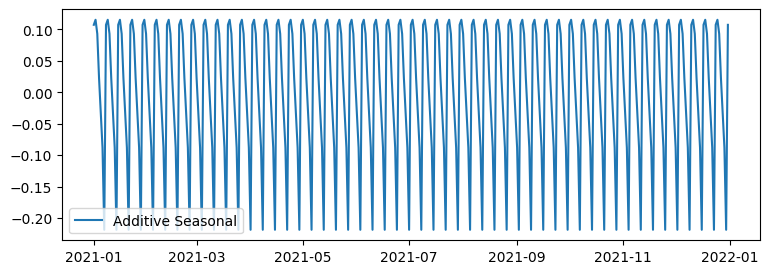

In [6]:
#Plot the Seasonal Component

plt.figure(figsize=(9, 3))
plt.plot(result_add.seasonal, label='Additive Seasonal')
plt.legend()

In [7]:
#Calculate the Simple Moving Average (SMA)

sma_window = 7 # 7-day moving average
sma = ts.rolling(window=sma_window).mean()
sma

,0
2021-01-01,NaN
2021-01-02,NaN
2021-01-03,NaN
2021-01-04,NaN
2021-01-05,NaN
...,...
2021-12-27,-0.326866
2021-12-28,-0.262944
2021-12-29,-0.142060
2021-12-30,0.030998


In [8]:
#Calculate Exponential Moving Average (EMA)

ema_window = 30 # 30-day moving average
ema = ts.ewm(span=ema_window, adjust=False).mean()
ema

,0
2021-01-01,0.882026
2021-01-02,0.839140
2021-01-03,0.818795
2021-01-04,0.841587
2021-01-05,0.851973
...,...
2021-12-27,-0.428505
2021-12-28,-0.405176
2021-12-29,-0.352307
2021-12-30,-0.320831


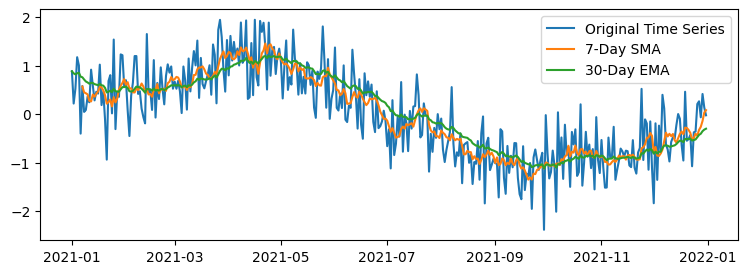

In [9]:
#Plotting the Moving Averages

plt.figure(figsize=(9, 3))
plt.plot(ts, label='Original Time Series')
plt.plot(sma, label=f'{sma_window}-Day SMA')
plt.plot(ema, label=f'{ema_window}-Day EMA')
plt.legend()